# **Numerieke Oplossing**

In [34]:
import numpy as np
import matplotlib.pyplot as plt

### **Variabelen**

In [62]:
dT = 0.5 # K
dt = 1 # s
dx = 0.01 # m
Tm = 54 + 273.15

l_l, rho_l, c_l = (0.15, 780, 2100)
l_s, rho_s, c_s = (0.24, 860, 2900)

L = 2.1e5

T_0 = 20 + 273.15
T_x0 = Tm
T_ref = Tm - dT

i_max, j_max = (1000, 100) # i: tijd, j: x

### **Functies**

In [30]:
def theta_l(T):
    if T >= Tm + dT:
        return 1
    elif Tm - dT < T and T < Tm + dT:
        return (T - Tm + dT)/2/dT
    else:
        return 0

def theta_s(T):
    return 1 - theta_l(T)

def l_phi(T):
    return theta_l(T) * l_l + theta_s(T) * l_s

def rho_phi(T):
    return theta_l(T) * rho_l + theta_s(T) * rho_s

def dtheta_dT(T):
    if Tm - dT < T and T < Tm + dT:
        return 1/2/dT
    else:
        return 0

def cA(T):
    return theta_l(T)*rho_s*c_s + theta_s(T)*rho_l*c_l + ((rho_l*c_l - rho_s*c_s)*(T - T_ref) + rho_l*L) * dtheta_dT(T)

### **Iteratie**

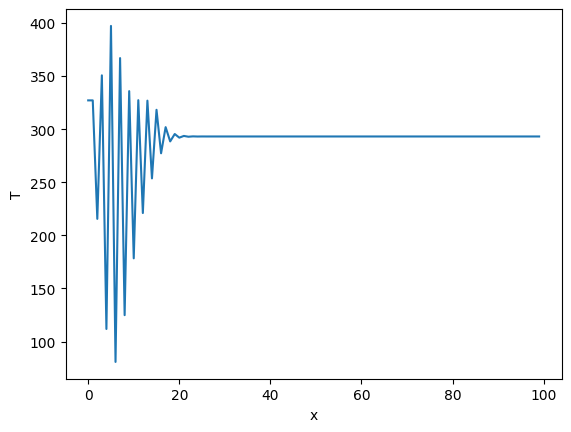

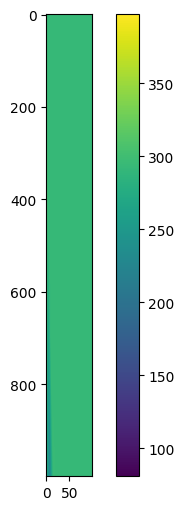

In [65]:
T_grid = np.ones((i_max, j_max))*T_0
T_grid[:,0] = T_x0
T_grid[:,1] = T_x0

for j in range(2, j_max):
    for i in range(i_max-1):
        T_grid[i+1, j] = T_grid[i, j] + dt/dx**2/cA(T_grid[i, j])*(l_phi(T_grid[i,j-1])*(T_grid[i,j]-T_grid[i,j-1]) - l_phi(T_grid[i,j-2])*(T_grid[i,j-1]-T_grid[i,j-2]))


plt.figure()
plt.plot(T_grid[-1,:])
plt.xlabel('x')
plt.ylabel('T')
plt.show()

plt.figure(figsize=(6,6))
plt.imshow(T_grid)
plt.colorbar()
plt.show()